<p align="center">
 <h2 align="center">📻 DepthFM: Fast Monocular Depth Estimation with Flow Matching</h2>
 <p align="center"> 
    Ming Gui<sup>*</sup> · Johannes S. Fischer<sup>*</sup> · Ulrich Prestel · Pingchuan Ma
 </p><p align="center"> 
    Dmytro Kotovenko · Olga Grebenkova · Stefan A. Baumann · Vincent Tao Hu · Björn Ommer
 </p>
 <p align="center"> 
    <b>CompVis Group, LMU Munich</b>
 </p>
  <p align="center"> <sup>*</sup> <i>equal contribution</i> </p>
</p>

 </p>

In [1]:
import torch
import einops
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Load Model

In [2]:
from depthfm import DepthFM

model = DepthFM('checkpoints/depthfm-v1.ckpt')

## Load Image

Shape     : torch.Size([1, 3, 512, 512])
dtype     : torch.float32


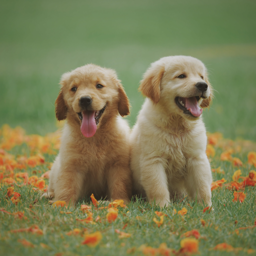

In [3]:
# set image filepath
im_fp = 'assets/dog.png'

# open the image
im = Image.open(im_fp).convert('RGB')

# convert to tensor and normalize to [-1, 1] range
x = np.array(im)
x = einops.rearrange(x, 'h w c -> c h w')
x = x / 127.5 - 1
x = torch.tensor(x, dtype=torch.float32)[None]

print(f"{'Shape':<10}: {x.shape}")
print(f"{'dtype':<10}: {x.dtype}")

display(im.resize((256, 256)))

## Inference

In [4]:
dev = 'cuda:4'
model = model.to(dev)
depth = model.predict_depth(x.to(dev), num_steps=2, ensemble_size=4)

print(f"{'Depth':<10}: {depth.shape}")

Depth     : torch.Size([1, 1, 512, 512])


## Visualize Result

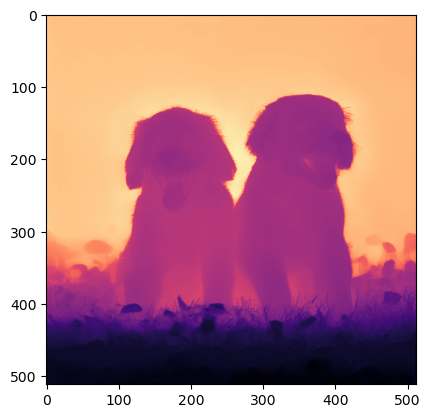

In [5]:
plt.imshow(depth.squeeze().cpu().numpy(), cmap='magma')
plt.show()